In [6]:
"""
    ███████╗███╗   ███╗ █████╗       ██████╗ ██╗███████╗███████╗
    ██╔════╝████╗ ████║██╔══██╗      ██╔══██╗██║██╔════╝██╔════╝
    █████╗  ██╔████╔██║███████║█████╗██║  ██║██║█████╗  █████╗
    ██╔══╝  ██║╚██╔╝██║██╔══██║╚════╝██║  ██║██║██╔══╝  ██╔══╝
    ███████╗██║ ╚═╝ ██║██║  ██║      ██████╔╝██║██║     ██║
    ╚══════╝╚═╝     ╚═╝╚═╝  ╚═╝      ╚═════╝ ╚═╝╚═╝     ╚═╝
"""

import os
import re
import sys
import h5py
import glob
import uuid
import time
import numpy as np
import pandas as pd
import SharedArray as sa
import PIL.Image as Image
import multiprocessing as mp
import matplotlib.pyplot as plt

from tqdm import tqdm
from emaDiff import Calibration, Scan


---
## Calibration

In [2]:
start_angle           = -2.5
end_angle             =  2.5
steps                 = 1000
xc                    = 240
yc                    = 329
ymin                  = 77
ymax                  = 404
calibration_folder    = '/calibration_folder_path/'
calibration_filename  = 'file_name'
xdet                  = 487
ydet                  = 619
lids_border_left      = 10
lids_border_right     = 10
output_file_path      = '/output_path/'

calibration_step = Calibration(start_angle,
                               end_angle,
                               steps,
                               xc,
                               yc,
                               ymin,
                               ymax,
                               calibration_folder,
                               calibration_filename,
                               xdet,
                               ydet,
                               lids_border_left,
                               lids_border_right)

det, calibration_matrix, volume, returned_lids = calibration_step.calibration_main_run()

calibration_hdf5_abs_file_path = "".join([output_file_path, calibration_filename, "proc_calibration.h5"])

with h5py.File(calibration_hdf5_abs_file_path, "w") as h5f:
    h5f.create_group("data")
    h5f.create_dataset("data/mythen", data=det, dtype=np.float32)
    h5f.create_dataset("data/calibration_vector", data=calibration_matrix, dtype=np.float32)
    h5f.create_dataset("data/volume", data=volume, dtype=np.float32)
    h5f.create_dataset("data/mythen_lids", data=[lids_border_left, lids_border_right], dtype=np.int16)

2024-06-14 18:32:47,847 - emaDiff - INFO - Generating list of files.
2024-06-14 18:32:47,848 - emaDiff - INFO - Running calibration scan!
2024-06-14 18:32:47,873 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-14 18:32:47,874 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-14 18:32:48,544 - emaDiff - INFO - Calculating Mythen matrix.
2024-06-14 18:32:48,711 - emaDiff - INFO - Mythen lids values defined are: [169, 344]
2024-06-14 18:32:48,711 - emaDiff - INFO - Calculating calibration vector using the Mythen matrix...
2024-06-14 18:32:48,729 - emaDiff - INFO - Finished the calibration pipeline for the Pilatus.


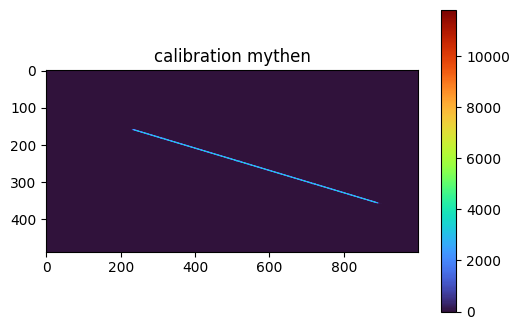

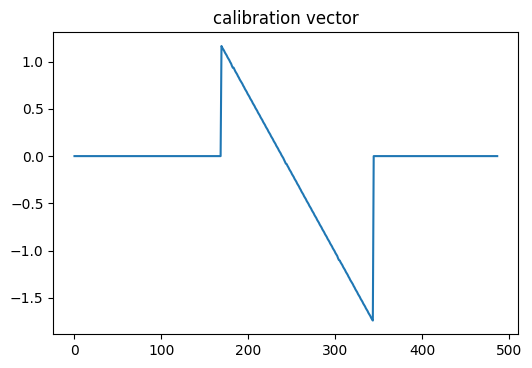

<Figure size 432x288 with 0 Axes>

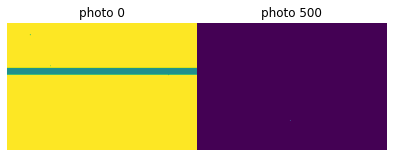

In [3]:
# plot the mythen matrix
plt.figure(0, dpi=100)
plt.imshow(det, interpolation='bilinear', cmap='turbo')
plt.title('calibration mythen')
plt.colorbar()
plt.show()

plt.figure(1, dpi=100)
plt.plot(calibration_matrix)
plt.title('calibration vector')
plt.show()

plt.figure(2)
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.1)
ax[0].imshow(volume[0])
ax[0].set_title(f"photo {'0'}")
ax[0].axis('off')
ax[1].imshow(volume[steps//2])
ax[1].set_title(f"photo {str(steps//2)}")
ax[1].axis('off')
plt.show()

In [8]:
returned_lids = [169, 344]

---
## Generate a single diffractogram 

In [4]:
start_angle             = 63
end_angle               = 70
steps                   = 700
xc                      = 240
yc                      = 329
output_file_path        = '/output_path/'
scan_folder             = '/scan_data_folder/'
scan_filename           = 'scan0113_'
ymin                    = 260
ymax                    = 354
xdet                    = 487
calibration_file_path   = '/calibration_data_path/'


In [ ]:
scan_main_instance  = Scan(start_angle,
                        end_angle,
                        steps,
                        xc,
                        yc,
                        output_file_path,
                        scan_folder,
                        scan_filename,
                        ymin,
                        ymax,
                        xdet,
                        returned_lids,
                        calibration_file_path)

mythen_xrd, two_theta_scan, sum_of_intensities, mean, std = scan_main_instance.scan_main_run()

plt.figure(dpi=100)
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.6)
ax[0].plot(two_theta_scan, sum_of_intensities)
ax[0].set_title(f"sum of intensities {scan_filename}")
ax[0].set_xlabel(r'2$\theta$ (deg)')
ax[0].set_ylabel("Intensity (counts)")
ax[1].plot(two_theta_scan, mean)
ax[1].set_title(f"mean {scan_filename}")
ax[1].set_xlabel(r'2$\theta$ (deg)')
ax[1].set_ylabel("Intensity (counts)")
plt.show()


---
## Generate multiple diffractograms at once

  0%|          | 0/14 [00:00<?, ?it/s]

============================================================ scan0100_ ============================================================
2024-06-15 16:07:20,877 - emaDiff - INFO - Generating list of files.
2024-06-15 16:07:20,878 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:07:20,910 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:07:20,910 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:07:22,208 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:07:22,212 - emaDiff - INFO - Two theta generated values: 36.005001068115234 and 49.994998931884766
2024-06-15 16:07:22,213 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:07:22,248 - emaDiff - INFO - det_start: 34.245 - det_end: 51.160
2024-06-15 16:07:22,249 - emaDiff - INFO - Start bin value: 34.23999893188476
2024-06-15 16:07:22,249 - emaDiff - INFO - End bin value: 51.16999984741211
2024-06-15 16:07:22,250 - emaDiff - INFO - Bi

<Figure size 600x400 with 0 Axes>

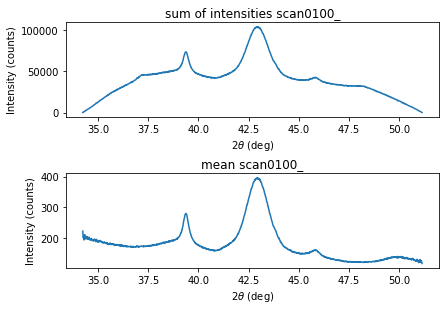

  7%|▋         | 1/14 [00:07<01:42,  7.87s/it]


Time execution of scan 100: 7.872857570648193s
============================================================ scan0101_ ============================================================
2024-06-15 16:07:28,820 - emaDiff - INFO - Generating list of files.
2024-06-15 16:07:28,820 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:07:28,846 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:07:28,847 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:07:29,601 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:07:29,604 - emaDiff - INFO - Two theta generated values: 63.005001068115234 and 69.99500274658203
2024-06-15 16:07:29,605 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:07:29,641 - emaDiff - INFO - det_start: 61.245 - det_end: 71.160
2024-06-15 16:07:29,642 - emaDiff - INFO - Start bin value: 61.23999893188476
2024-06-15 16:07:29,643 - emaDiff - INFO - End bin value: 71.1700036621093

<Figure size 600x400 with 0 Axes>

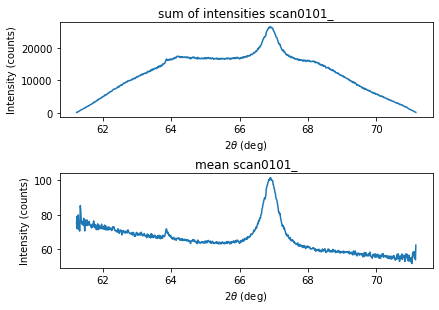

 14%|█▍        | 2/14 [00:15<01:33,  7.82s/it]


Time execution of scan 101: 15.663293361663818s
============================================================ scan0102_ ============================================================
2024-06-15 16:07:36,584 - emaDiff - INFO - Generating list of files.
2024-06-15 16:07:36,585 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:07:36,617 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:07:36,618 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:07:37,898 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:07:37,901 - emaDiff - INFO - Two theta generated values: 36.005001068115234 and 49.994998931884766
2024-06-15 16:07:37,902 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:07:37,938 - emaDiff - INFO - det_start: 34.245 - det_end: 51.160
2024-06-15 16:07:37,940 - emaDiff - INFO - Start bin value: 34.23999893188476
2024-06-15 16:07:37,941 - emaDiff - INFO - End bin value: 51.16999984741

<Figure size 600x400 with 0 Axes>

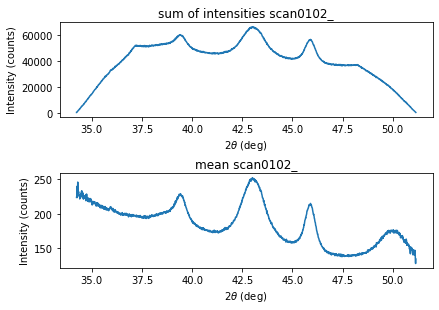

 21%|██▏       | 3/14 [00:23<01:26,  7.84s/it]


Time execution of scan 102: 23.53280472755432s
============================================================ scan0103_ ============================================================
2024-06-15 16:07:44,486 - emaDiff - INFO - Generating list of files.
2024-06-15 16:07:44,487 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:07:44,517 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:07:44,517 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:07:45,262 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:07:45,265 - emaDiff - INFO - Two theta generated values: 63.005001068115234 and 69.99500274658203
2024-06-15 16:07:45,267 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:07:45,288 - emaDiff - INFO - det_start: 61.245 - det_end: 71.160
2024-06-15 16:07:45,289 - emaDiff - INFO - Start bin value: 61.23999893188476
2024-06-15 16:07:45,291 - emaDiff - INFO - End bin value: 71.1700036621093

<Figure size 600x400 with 0 Axes>

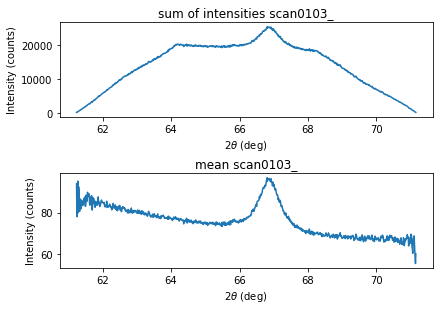

 29%|██▊       | 4/14 [00:31<01:20,  8.01s/it]


Time execution of scan 103: 31.80902647972107s
============================================================ scan0104_ ============================================================
2024-06-15 16:07:52,717 - emaDiff - INFO - Generating list of files.
2024-06-15 16:07:52,718 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:07:52,750 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:07:52,752 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:07:53,882 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:07:53,886 - emaDiff - INFO - Two theta generated values: 36.005001068115234 and 49.994998931884766
2024-06-15 16:07:53,887 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:07:53,942 - emaDiff - INFO - det_start: 34.245 - det_end: 51.160
2024-06-15 16:07:53,944 - emaDiff - INFO - Start bin value: 34.23999893188476
2024-06-15 16:07:53,945 - emaDiff - INFO - End bin value: 51.169999847412

<Figure size 600x400 with 0 Axes>

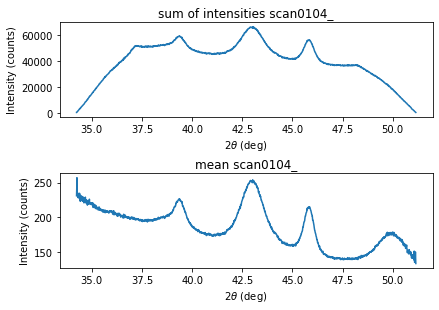

 36%|███▌      | 5/14 [00:41<01:17,  8.66s/it]


Time execution of scan 104: 41.625356674194336s
============================================================ scan0105_ ============================================================
2024-06-15 16:08:02,572 - emaDiff - INFO - Generating list of files.
2024-06-15 16:08:02,574 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:08:02,616 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:08:02,617 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:08:03,422 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:08:03,426 - emaDiff - INFO - Two theta generated values: 63.005001068115234 and 69.99500274658203
2024-06-15 16:08:03,429 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:08:03,450 - emaDiff - INFO - det_start: 61.245 - det_end: 71.160
2024-06-15 16:08:03,451 - emaDiff - INFO - Start bin value: 61.23999893188476
2024-06-15 16:08:03,452 - emaDiff - INFO - End bin value: 71.170003662109

<Figure size 600x400 with 0 Axes>

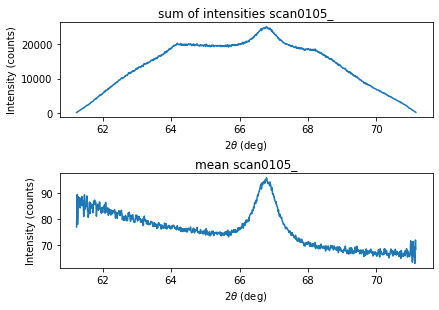

 43%|████▎     | 6/14 [00:50<01:08,  8.59s/it]


Time execution of scan 105: 50.06880974769592s
============================================================ scan0106_ ============================================================
2024-06-15 16:08:10,977 - emaDiff - INFO - Generating list of files.
2024-06-15 16:08:10,978 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:08:11,009 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:08:11,010 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:08:12,132 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:08:12,135 - emaDiff - INFO - Two theta generated values: 36.005001068115234 and 49.994998931884766
2024-06-15 16:08:12,137 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:08:12,187 - emaDiff - INFO - det_start: 34.245 - det_end: 51.160
2024-06-15 16:08:12,189 - emaDiff - INFO - Start bin value: 34.23999893188476
2024-06-15 16:08:12,190 - emaDiff - INFO - End bin value: 51.169999847412

<Figure size 600x400 with 0 Axes>

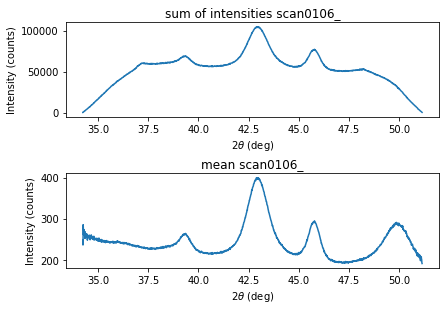

 50%|█████     | 7/14 [00:58<01:00,  8.59s/it]


Time execution of scan 106: 58.66719722747803s
============================================================ scan0107_ ============================================================
2024-06-15 16:08:19,606 - emaDiff - INFO - Generating list of files.
2024-06-15 16:08:19,607 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:08:19,636 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:08:19,638 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:08:20,279 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:08:20,284 - emaDiff - INFO - Two theta generated values: 63.005001068115234 and 69.99500274658203
2024-06-15 16:08:20,285 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:08:20,305 - emaDiff - INFO - det_start: 61.245 - det_end: 71.160
2024-06-15 16:08:20,306 - emaDiff - INFO - Start bin value: 61.23999893188476
2024-06-15 16:08:20,308 - emaDiff - INFO - End bin value: 71.1700036621093

<Figure size 600x400 with 0 Axes>

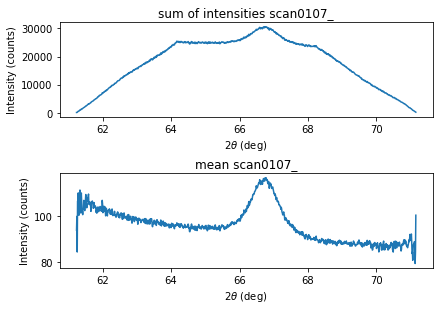

 57%|█████▋    | 8/14 [01:08<00:53,  8.90s/it]


Time execution of scan 107: 68.23530769348145s
============================================================ scan0108_ ============================================================
2024-06-15 16:08:29,143 - emaDiff - INFO - Generating list of files.
2024-06-15 16:08:29,144 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:08:29,177 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:08:29,177 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:08:30,448 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:08:30,454 - emaDiff - INFO - Two theta generated values: 36.005001068115234 and 49.994998931884766
2024-06-15 16:08:30,456 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:08:30,509 - emaDiff - INFO - det_start: 34.245 - det_end: 51.160
2024-06-15 16:08:30,511 - emaDiff - INFO - Start bin value: 34.23999893188476
2024-06-15 16:08:30,513 - emaDiff - INFO - End bin value: 51.169999847412

<Figure size 600x400 with 0 Axes>

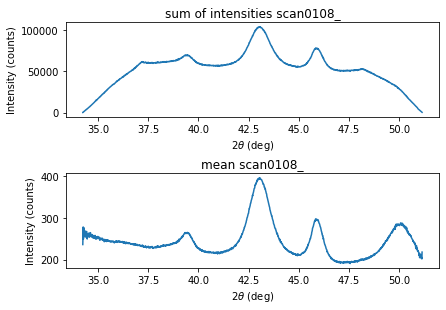

 64%|██████▍   | 9/14 [01:16<00:44,  8.80s/it]


Time execution of scan 108: 76.81379246711731s
============================================================ scan0109_ ============================================================
2024-06-15 16:08:37,773 - emaDiff - INFO - Generating list of files.
2024-06-15 16:08:37,775 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:08:37,817 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:08:37,819 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:08:38,546 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:08:38,550 - emaDiff - INFO - Two theta generated values: 63.005001068115234 and 69.99500274658203
2024-06-15 16:08:38,553 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:08:38,587 - emaDiff - INFO - det_start: 61.245 - det_end: 71.160
2024-06-15 16:08:38,589 - emaDiff - INFO - Start bin value: 61.23999893188476
2024-06-15 16:08:38,591 - emaDiff - INFO - End bin value: 71.1700036621093

<Figure size 600x400 with 0 Axes>

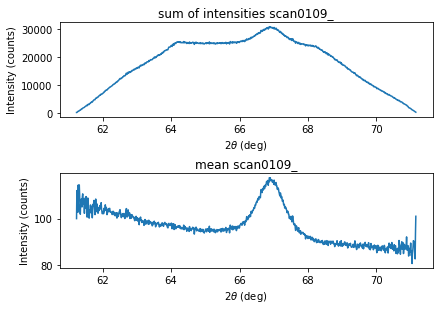

 71%|███████▏  | 10/14 [01:25<00:35,  8.88s/it]


Time execution of scan 109: 85.85488533973694s
============================================================ scan0110_ ============================================================
2024-06-15 16:08:46,764 - emaDiff - INFO - Generating list of files.
2024-06-15 16:08:46,766 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:08:46,799 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:08:46,800 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:08:47,977 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:08:47,981 - emaDiff - INFO - Two theta generated values: 36.005001068115234 and 49.994998931884766
2024-06-15 16:08:47,983 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:08:48,036 - emaDiff - INFO - det_start: 34.245 - det_end: 51.160
2024-06-15 16:08:48,037 - emaDiff - INFO - Start bin value: 34.23999893188476
2024-06-15 16:08:48,038 - emaDiff - INFO - End bin value: 51.169999847412

<Figure size 600x400 with 0 Axes>

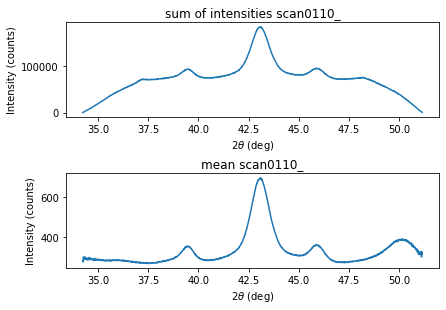

 79%|███████▊  | 11/14 [01:33<00:25,  8.58s/it]


Time execution of scan 110: 93.775559425354s
============================================================ scan0111_ ============================================================
2024-06-15 16:08:54,729 - emaDiff - INFO - Generating list of files.
2024-06-15 16:08:54,731 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:08:54,758 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:08:54,759 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:08:55,592 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:08:55,595 - emaDiff - INFO - Two theta generated values: 63.005001068115234 and 69.99500274658203
2024-06-15 16:08:55,597 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:08:55,633 - emaDiff - INFO - det_start: 61.245 - det_end: 71.160
2024-06-15 16:08:55,635 - emaDiff - INFO - Start bin value: 61.23999893188476
2024-06-15 16:08:55,636 - emaDiff - INFO - End bin value: 71.17000366210938


<Figure size 600x400 with 0 Axes>

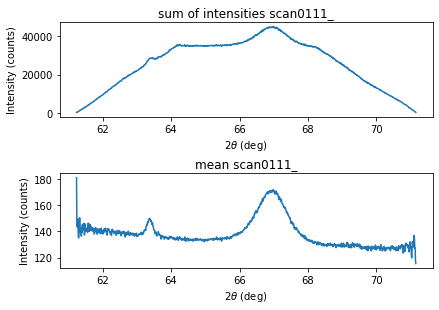

 86%|████████▌ | 12/14 [01:43<00:17,  8.85s/it]


Time execution of scan 111: 103.23020339012146s
============================================================ scan0112_ ============================================================
2024-06-15 16:09:04,136 - emaDiff - INFO - Generating list of files.
2024-06-15 16:09:04,136 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:09:04,165 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:09:04,166 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:09:05,306 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:09:05,310 - emaDiff - INFO - Two theta generated values: 36.005001068115234 and 49.994998931884766
2024-06-15 16:09:05,312 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:09:05,365 - emaDiff - INFO - det_start: 34.245 - det_end: 51.160
2024-06-15 16:09:05,365 - emaDiff - INFO - Start bin value: 34.23999893188476
2024-06-15 16:09:05,366 - emaDiff - INFO - End bin value: 51.16999984741

<Figure size 600x400 with 0 Axes>

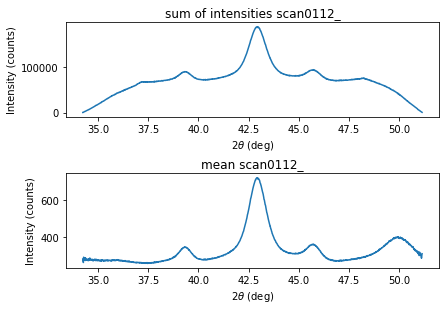

 93%|█████████▎| 13/14 [01:50<00:08,  8.51s/it]


Time execution of scan 112: 110.97186779975891s
============================================================ scan0113_ ============================================================
2024-06-15 16:09:11,915 - emaDiff - INFO - Generating list of files.
2024-06-15 16:09:11,916 - emaDiff - INFO - Running calibration scan!
2024-06-15 16:09:11,941 - emaDiff - INFO - Calibration Scan done successfully.
2024-06-15 16:09:11,942 - emaDiff - INFO - Reading TIFF files and generating volume...
2024-06-15 16:09:12,709 - emaDiff - INFO - Start to generate the diffractogram...
2024-06-15 16:09:12,713 - emaDiff - INFO - Two theta generated values: 63.005001068115234 and 69.99500274658203
2024-06-15 16:09:12,715 - emaDiff - INFO - Calculating the pixel address vector mapping...
2024-06-15 16:09:12,752 - emaDiff - INFO - det_start: 61.245 - det_end: 71.160
2024-06-15 16:09:12,753 - emaDiff - INFO - Start bin value: 61.23999893188476
2024-06-15 16:09:12,755 - emaDiff - INFO - End bin value: 71.170003662109

<Figure size 600x400 with 0 Axes>

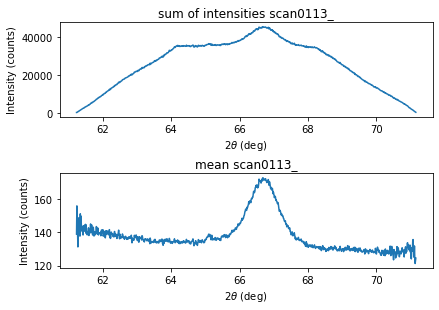

100%|██████████| 14/14 [01:59<00:00,  8.50s/it]


Time execution of scan 113: 119.06575179100037s

Total time execution of all XRD processing: 119.06723666191101s


In [20]:
# temporary parameters
t0 = time.time()
start_angle_alternate = [36, 63]
end_angle_alternate = [50, 70]
steps_alternate = [1400, 700]
scan_range = [100, 114] # scan_range_alternate

scan_range_indexes = np.linspace(scan_range[0], scan_range[1], scan_range[1] - scan_range[0], endpoint=False, dtype=int)

# fixed parameters
xc                    = 240
yc                    = 329
output_file_path      = '/output_path/'
scan_folder           = '/scan_data_path/'
ymin                  = 260
ymax                  = 399
xdet                  = 487
calibration_file_path = "/calibration_path/file_name_proc_calibration.h5"

for scan in tqdm(scan_range_indexes):
    t0_ = time.time()
    try:
        scan_test_index = np.where(scan_range_indexes == scan)[0][0]
        if scan_test_index % 2 == 0: 
            start_angle   = start_angle_alternate[0]
            end_angle     = end_angle_alternate[0]
            steps         = steps_alternate[0]
            scan_filename = f'scan0{scan}_'
            print(f'{60*"="} {scan_filename} {60*"="}')
        else:
            start_angle   = start_angle_alternate[1]
            end_angle     = end_angle_alternate[1]
            steps         = steps_alternate[1]
            scan_filename = f'scan0{scan}_'
            print(f'{60*"="} {scan_filename} {60*"="}')

        scan_main_instance  = Scan(start_angle,
                                end_angle,
                                steps,
                                xc,
                                yc,
                                output_file_path,
                                scan_folder,
                                scan_filename,
                                ymin,
                                ymax,
                                xdet,
                                returned_lids,
                                calibration_file_path)

        mythen_xrd, two_theta_scan, sum_of_intensities, mean, std = scan_main_instance.scan_main_run()

        plt.figure(dpi=100)
        fig, ax = plt.subplots(nrows=2, ncols=1)
        fig.tight_layout()
        plt.subplots_adjust(wspace=0.0, hspace=0.6)
        ax[0].plot(two_theta_scan, sum_of_intensities)
        ax[0].set_title(f"sum of intensities {scan_filename}")
        ax[0].set_xlabel(r'2$\theta$ (deg)')
        ax[0].set_ylabel("Intensity (counts)")
        ax[1].plot(two_theta_scan, mean)
        ax[1].set_title(f"mean {scan_filename}")
        ax[1].set_xlabel(r'2$\theta$ (deg)')
        ax[1].set_ylabel("Intensity (counts)")
        plt.show()

        print(f'\nTime execution of scan {scan}: {time.time() - t0_}s')
    except:
        raise ValueError(f'Scan {scan} was not processed and returned an error!')


print(f'\nTotal time execution of all XRD processing: {time.time() - t0}s')